In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
noise=np.random.random(1440)
print(noise)
print(noise.shape)

[0.26617653 0.70405284 0.97052142 ... 0.65760585 0.71629085 0.57960152]
(1440,)


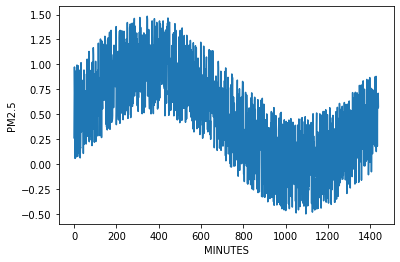

In [3]:
time=1440
T=np.arange(time)
pol= 0.5* np.sin(2*np.pi*T/time) 
data=pol+noise

plt.xlabel("MINUTES")
plt.ylabel("PM2.5")
plt.plot(T,data)

plt.show()

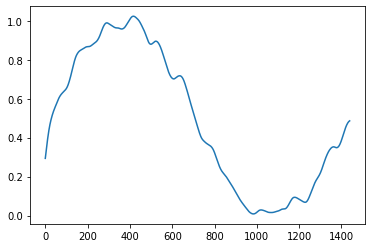

In [4]:
cutoff_freq=0.01
sampling_rate=1
nyquist=0.5* sampling_rate

from scipy import signal

b,a= signal.butter(N=2, Wn= cutoff_freq/ nyquist)

smooth= signal.filtfilt(b,a,data)
plt.plot(T,smooth)

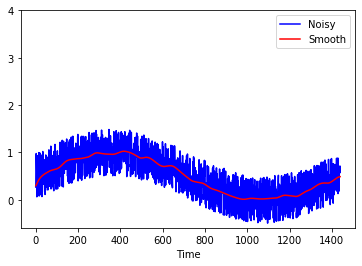

In [5]:
plt.plot(T,data, c='b')
plt.plot(T,smooth, c='r')

plt.legend(['Noisy', 'Smooth'])
plt.xlabel('Time')
plt.yticks([0,1,2,3,4])
plt.show()

In [6]:
smooth[8]

0.367539836105215

24
0.293490482863589
29.13600521765945
38.71717027720861
48.79265829143327
52.3364341557557
57.0822381263552
58.06236390385013
59.46677588836741
58.80348560973056
53.31610327175141
46.90382614185022
42.41200233192321
33.89863310737291
23.359341664633757
17.41639674265926
10.350256954846655
4.054905692327265
0.9919291314879449
1.2019209479497743
1.6513119736753392
4.673271363508365
4.992539067024218
12.079056558525846
20.042514071658207


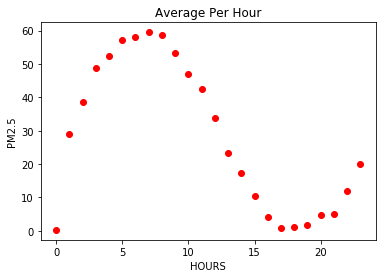

In [7]:
hrs=np.arange(24)
def func():
    avg=[]
    s=0
    for i in range(len(smooth)):
        s+= smooth[i]
        if (i%60==0):
            avg.append(s)
            s=0
    return avg
avg=func()
print(len(avg))
for i in avg:
    print(i)
plt.scatter(hrs, avg, c='r')
plt.title("Average Per Hour")
plt.xlabel("HOURS")
plt.ylabel("PM2.5")
plt.show()


In [8]:
def exceed():
    cnt=0
    mins=[]
    for i in T:
        if (int(smooth[i])>0.5):
            cnt+=1
        else:
            cnt=0
        if (cnt>=5):    
            for j in range(10):
                mins.append(smooth[i-j])
                
            cnt=0
                
    return mins
            
mins= exceed()
print(mins)

[1.007886014749763, 1.0062174977726817, 1.0045252434480685, 1.0028166495304303, 1.0010969596809116, 0.9993679233462652, 0.9976273050068544, 0.9958699820348411, 0.9940909284950087, 0.9922882575534491, 1.0155351943410504, 1.0141383075613923, 1.0126615259679634, 1.0111184347545734, 1.0095227105318565, 1.007886014749763, 1.0062174977726817, 1.0045252434480685, 1.0028166495304303, 1.0010969596809116, 1.0209113319262844, 1.0200815097528495, 1.0191225032267939, 1.018039032617395, 1.0168395222061533, 1.0155351943410504, 1.0141383075613923, 1.0126615259679634, 1.0111184347545734, 1.0095227105318565, 1.0231663996111013, 1.0229517841833444, 1.0226254555319079, 1.0221805456080675, 1.021610558867777, 1.0209113319262844, 1.0200815097528495, 1.0191225032267939, 1.018039032617395, 1.0168395222061533, 1.0226922865691248, 1.0229874045338345, 1.0231833545501328, 1.023279525247229, 1.0232745535128562, 1.0231663996111013, 1.0229517841833444, 1.0226254555319079, 1.0221805456080675, 1.021610558867777, 1.0197